# Проект -  "Анализ оттока клиентов Банка".

**Материалы:** 
- Ссылка на дашборд - https://public.tableau.com/app/profile/usr036943/viz/final_project2_16768084185420/Dashboard2 
- Ссылка на презентацию - https://disk.yandex.ru/i/BZePBptY_eAnQA

## 1 Описание проекта. 

Опишем общую информацию о заказчике, план проекта и цели.

**Общая информация о заказчике:**

В одном из лучших банков страны требуются услуги аналитика с уверенным владением Python. Необходимо проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка. Сегментация покажет, как клиенты пользуются услугами банка. Данный проект служит для выявления портрета клиентов, которые склонны уходить из банка и для проверки гипотез, и прежде всего для снижения оттока. 


Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Задачи:**

Проведести исследовательский анализ данных,
Выделить портреты клиентов, которые склонны уходить из банка,
Сформулировать и проверить статистические гипотезы.

**План проекта:**

1. Описание проекта.
2. Загрузка данных и изучение общей информации.
3. Предобработка данных.
4. Исследовательский анализ данных.
5. Проверка гипотез.
6. Общие выводы.

## 2 Загрузка данных и изучение общей информации. 

Импортируем необходимые библиотеки, выведем основную информацию о датафрейме, проверим данные на дубликаты и пропуски. 

In [1]:
# Импортируем необходимые библиотеки.

import pandas as pd
import numpy as np
import seaborn as sns
import re
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st 
import warnings 

# отключаем предупреждения
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('/datasets/bank_dataset.csv') # прочитаем файл с гипотезами и сохраним результат в датафрейме df
df.head() # выведем первые 5 строк таблицы на экран 

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Перед нами таблица содержашая 12 столбцов:
    
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Необходимо привести названия столбцов к нижнему регистру. 

In [3]:
df.info() # выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Всего 10 000 строк. Столбцы `City` и `Gender` имееют тип - object, остальные столбцы - числовой. 

In [4]:
df['City'].unique() # выведем уникальные названия городов в столбце City.

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

В данных 3 города, что соответствует описанию проекта. 

In [5]:
df.duplicated().sum() #выведем количество дубликатов

0

В таблице дубликатов нет.

In [6]:
df['userid'].nunique() # посмотрим на количество уникальных значений клиентов банка

10000

Количество уникальных клиентов сооветствует количеству строк в таблице. 

In [7]:
# найдем процент пропущеных значений в каждом столбце
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
userid,0.000000
score,0.000000
City,0.000000
Gender,0.000000
Age,0.000000
Objects,0.000000
Balance,36.170000
Products,0.000000
CreditCard,0.000000
Loyalty,0.000000


Как видим, есть пропуски в столбце `Balance` (36,17%). Число пропусков значимое (более 5%).

In [8]:
df.loc[df.isnull().any(axis=1)] # выводем клиентов с пропусками

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


Клиенты с пропусками в столбце `Balance` встречаются во всех 3 городах, как у действующих клиентов и тех кто ушел, имеют подключенные продукты (например кредитные карты) -  делаем вывод, что это клиенты которые не имеют лицевой счет в банке и пользуются только кредитыми продуктами. В данном случае с пропусками ничего не делаем, оставляем все как есть. 

**Вывод:** Датасет содержит данные о клиентах банка. Всего 10 000 строк и 12 столбцов. В данных 3 города: Ярославль, Ростов Великий и Рыбинск. Дубликатов и пропусков нет. Типы данных соответсвуют значениям. Для дальнейшего удобства работы с датсетом необходимо привести названия столбцов к нижнему регистру.

## 3 Предобработка данных. 

Приведем названия столбцов к единому стилю и город клиента в бинарный формат - добавим 3 столбца, где значение 1 будет соответствовать городу клиента.

In [9]:
df.columns = df.columns.str.lower() # приводим названия столбцов к нижнему регистру

In [10]:
df = df.rename(columns = {'userid':'user_id','creditcard':'credit_card'}) # заменим названия столбцов в более читабельный формат

Создадим словарь с рускими наименованиями столбцов для дальнейшей визиуализации на графиках. 

In [11]:
rus_columns = ['id пользователя', 'кредитный скоринг', 'город', 'пол', 'возраст', 'объекты в собственности',
              'остаток на счете', 'используемые продукты', 'кредитная карта', 'активный клиент', 'оценка зарплаты',
              'отток']
df_columns_dict = dict(zip(df.columns, rus_columns))
df_columns_dict

{'user_id': 'id пользователя',
 'score': 'кредитный скоринг',
 'city': 'город',
 'gender': 'пол',
 'age': 'возраст',
 'objects': 'объекты в собственности',
 'balance': 'остаток на счете',
 'products': 'используемые продукты',
 'credit_card': 'кредитная карта',
 'loyalty': 'активный клиент',
 'estimated_salary': 'оценка зарплаты',
 'churn': 'отток'}

**Вывод:** Привели названия столбцов к единому стилю - к нижнему змеиному регистру. Предобработка данных завершена.

## 4 Исследовательский анализ данных. 

Целью анализа является определение характерных портретов клиентов банка. Построим гистограммы распределения значений и Матрицу корреляций.

### 4.1 Анализ средних значений. 

In [12]:
df.drop('user_id', axis=1).groupby(by='churn').mean().round(2)

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,651.85,37.41,5.03,119535.86,1.54,0.71,0.55,99738.39
1,645.35,44.84,4.93,120746.97,1.48,0.70,0.36,101465.68


Что видим по средним показателям:

- срединий скоринговый балл слабо отличается;
- средний возраст ушедших клиентов заметно выше - 45 лет против 38 лет; 
- количество объектов в собственности +/- одинаковое;
- разница в количестве денег на счету минимальная;
- среднее количество используемых продуктов банка незначительно различается;
- наличие кредитки у обеих групп на одном уровне;
- у клиентов оттока ниже показатель активности;
- уровень дохода практически одинаковый. 

### 4.2 Количественные признаки.

Посмотрим признаки: 
- `score` — баллы кредитного скоринга,
- `age` — возраст,
- `objects` — количество объектов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `estimated_salary` — заработная плата клиента,

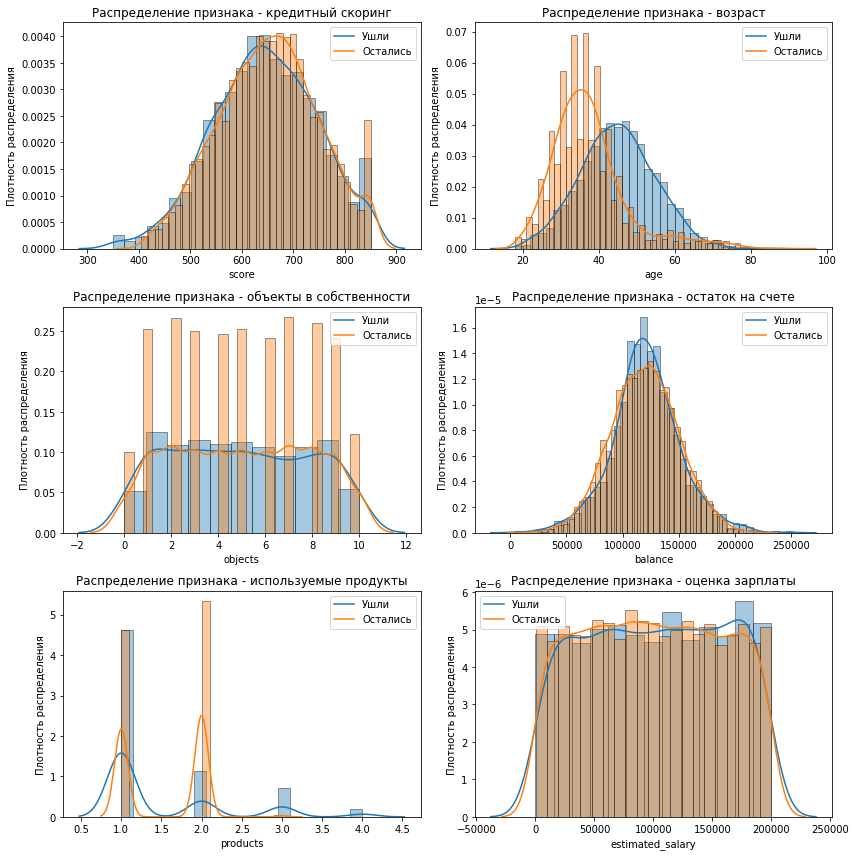

In [13]:
params = ['score', 'age', 'objects','balance', 'products', 'estimated_salary']
col_count, row_count = 2, 3

plt.figure(figsize=(12, 12))

for i, param in enumerate(params):
    for churn in df['churn'].unique():
        current = df.query('churn == @churn')
        sns.distplot(current[param], 
                     kde=True,
                     hist_kws={'edgecolor':'black'}, 
                     ax = plt.subplot(row_count, col_count, i + 1)
                    )
    plt.title(f'Распределение признака - {df_columns_dict[param]}')
    #plt.title('Распределение по признаку '+param)
    #plt.legend(df['churn'], title = 'Отток')
    plt.legend(['Ушли', 'Остались'])
    plt.ylabel('Плотность распределения')
plt.tight_layout() 
plt.show()

Приблизительно одинаковое поведение клиентов по признакам: кредитный скоринг, количество объектов, оценочная зарплата, что может говроить о том, что эти признаки не оказывают существенного влияния на факт оттока клиентов.

Также видны  **различия** в поведении клиентов по признакам: **возраст, количество используемых продуктов и баланс лицевого счета**.

### 4.3 Категоральные и дискретные признаки.

Анализируем признаки: 

- `gender` — пол: Ж - женский, М - мужской;
- `credit_card` — есть ли кредитная карта: 0 - нет карты, 1 - есть кредитная карта;
- `loyalty` — активный клиент: 0 - не актиный, 1 - активный. 

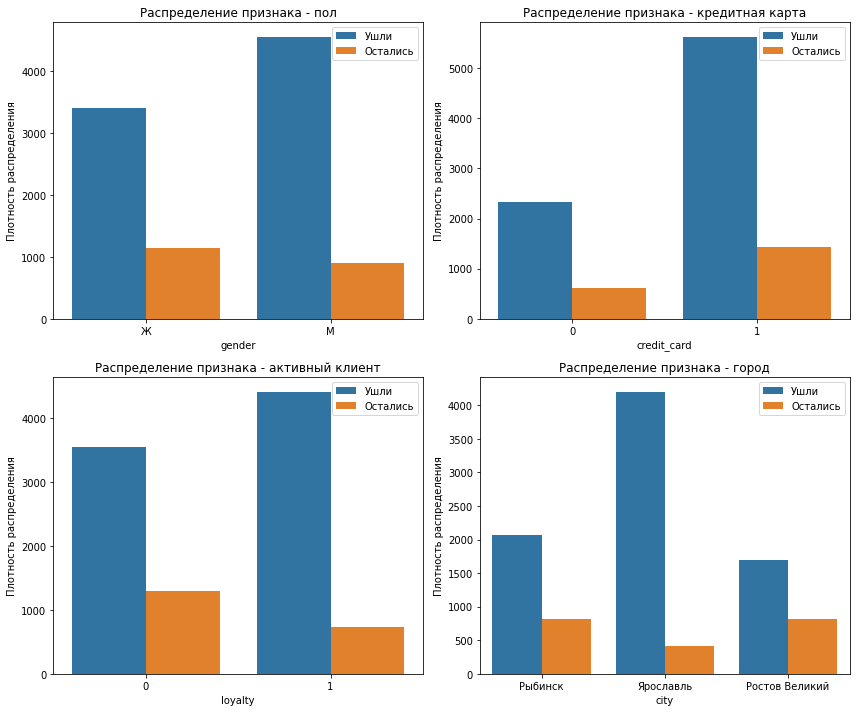

In [14]:
params = ['gender', 'credit_card', 'loyalty', 'city']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 10))

for i, param in enumerate(params):
    for churn in df['churn'].unique():
        current = df.query('churn == @churn')
        sns.countplot(current[param], hue=df['churn'],
                      ax = plt.subplot(row_count, col_count, i + 1)
                     )
    plt.title(f'Распределение признака - {df_columns_dict[param]}')
    #plt.title('Распределение по признаку '+param)
    #plt.legend(df['churn'], title = 'Отток')
    plt.legend({'Остались', 'Ушли'}, loc='upper right')
    plt.ylabel('Плотность распределения')
plt.tight_layout()    
plt.show()

Проанализировав распределение признаков по полу, наличию кредитной карты и активности клиентов с разбивкой по факту оттока делаем следующие выводы:

- среди женщин процент ушедших в отток выше, чем среди мужчин;

- кредитные карты скорее влияют на отток, чем нет;

- среди тех клиентов, кто не проявлял активности отток выше, чем среди тех, кто является активным пользователем банковских услуг;

- в Рыбинске и Ростове Великим отток клиентов проходит более активнее чем в Ярославле. 

### 4.4 Матрица корреляций.

Для создании матрицы кореляции для всех парметров необходимо перевести пол клиента и город в бинарный формат.

In [15]:
df['gender'] = df['gender'].map({'М':1, 'Ж':0}) # в столбце `gender` изменим значения на числовые

In [16]:
df = pd.get_dummies(df, columns=['city']) # переведем город клиента в бинарный формат
df.head() # выведем первые 5 строк таблицы на экран 

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,0,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,0,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Заменили "М" и "Ж" в столбце `gender` на 1 и 0 соответственно. Получили 3 новых столбца: `city_Ростов Великий`, `city_Рыбинск`, `city_Ярославль` со значениями 1 и 0, где 1 - соответсвует городу клиента, 0 - нет. 

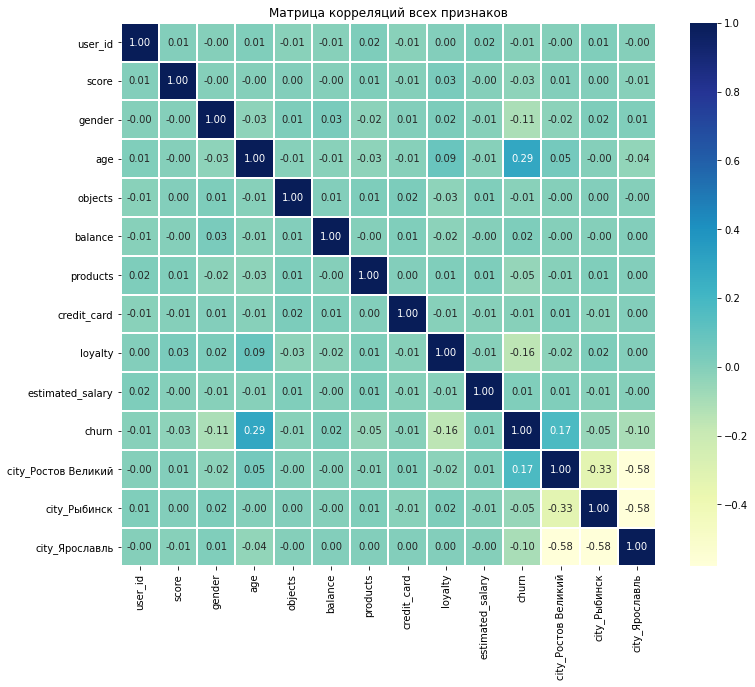

In [17]:
# отобразим heatmap
corr_m = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций всех признаков');

Мультиколлинеарности не обнаружено, все признаки незначительно коррелируют друг с другом. С целевой переменной `churn` больше всего коррелируют:
- **age (0,29)** - линейная связь слабая, но она положительная (чем больше возраст, тем выше отток);
- **city_Ростов Великий (0,17)** - тут линейная связь тоже положительнаясвязь, но еще слабее;
- **loyalty (-0,16)** - линейная связь слабо-отрицательная;
- **gender (-0,11)** - линейная связь слабо-отрицательная.

**Вывод:**

По средним показателям:

- срединий скоринговый балл слабо отличается;
- средний возраст ушедших клиентов заметно выше - 45 лет против 38 лет; 
- количество объектов в собственности +/- одинаковое;
- разница в количестве денег на счету минимальная;
- среднее количество используемых продуктов банка незначительно различается;
- наличие кредитки у обеих групп на одном уровне;
- у клиентов оттока ниже показатель активности;
- уровень дохода практически одинаковый. 

Приблизительно одинаковое поведение клиентов в диаграмме распределения по признакам: кредитный скоринг, количество объектов, оценочная зарплата, что может говроить о том, что эти признаки не оказывают существенного влияния на факт оттока клиентов.

Также видны **различия** в поведении клиентов по признакам: **возраст, количество используемых продуктов и баланс лицевого счета**.

Проанализировав распределение признаков по полу, наличию кредитной карты и активности клиентов с разбивкой по факту оттока делаем следующие выводы:

- **среди женщин процент ушедших в отток выше, чем среди мужчин**;

- **кредитные карты скорее влияют на отток, чем нет**;

- **среди тех клиентов, кто не проявлял активности отток выше, чем среди тех, кто является активным пользователем банковских услуг**;

- **в Рыбинске и Ростове Великим отток клиентов проходит более активнее чем в Ярославле**.
    
Построив матрицу корреляций видим, что мультиколлинеарности не обнаружено, все признаки незначительно коррелируют друг с другом. С целевой переменной **churn** больше всего коррелируют:

- **age (0,29)** - линейная связь слабая, но она положительная (чем больше возраст, тем выше отток);
- **city_Ростов Великий (0,17)** - тут линейная связь тоже положительнаясвязь, но еще слабее;
- **loyalty (-0,16)** - линейная связь слабо-отрицательная;
- **gender (-0,11)** - линейная связь слабо-отрицательная.

## 5 Проверка гипотез:

###  5.1 Гипотеза 1.

Проверим, есть ли статистически значимое **различие в уровне доходов** между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка.

В качестве нулевой и альтернативной гипотезы мы взяли следующее:

- **H0:** статистически значимых **различий** в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**.

- **H1:** статистически значимые **различия** в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

Зададим значение alpha равное 0.05, это критический уровень статистической значимости если p-value окажется меньше него - отвергнем нулевую гипотезу.

Исходя из пункта 4.1. в распределение признака - оценка зарплаты, наши выборки имеют равномерное распределение и обладают достаточной величиной данных, значит проверять гипотезу будем c помощью t-критерия Стьюдента. Применять будем метод ttest_ind библиотеки scipy для сравнения средних двух независимых выборок с различной дисперсией.

In [18]:
alpha = .05

# Создадим две выборки - те, кто является клиентом банка, и те, кто покинул
results = st.ttest_ind(
    df.query('churn == 0')['estimated_salary'], 
    df.query('churn == 1')['estimated_salary']
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.22644042802223352
Не получилось отвергнуть нулевую гипотезу


По результатам не отвергаем нулевую гипотезу, а значит - **статистически значимые различия в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка нет.**

### 5.2 Гипотеза 2. 

Проверим, есть ли статистически значимое **различие в количестве используемых продуктов банка** между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка.

В качестве нулевой и альтернативной гипотезы мы взяли следующее:

- **Н0:** статистически значимых **различий** в распределении количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **нет**.

- **Н1:** статистически значимые **различия** в распределении количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка **есть**.

Зададим значение alpha равное 0.05, это критический уровень статистической значимости если p-value окажется меньше него - отвергнем нулевую гипотезу.

Исходя из пункта 4.1. в распределение признака - используемые продукты, наши выборки имеют не равномерное распределение. Если данные в A/B-тесте не из нормального распределения, то T-test использовать нельзя. Применим тест Манн-Уитни.

In [19]:
alpha = .05

# Создадим две выборки - те, кто является клиентом банка, и те, кто покинул
results_prod = st.mannwhitneyu(
    df.query('churn == 0')['products'], 
    df.query('churn == 1')['products'],
    alternative='two-sided'
)

print('p-значение: ', results_prod.pvalue)

if results_prod.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  5.275105212817194e-36
Отвергаем нулевую гипотезу


По результатам отвергаем нулевую гипотезу, а значит - **статистически значимые различия в распределении количества используемых продуктов банка между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка есть.**

## 6 Общие выводы. 

Опишем портеры работающих клиентов и тех, кто ушел. Дадим рекомендации по итогам проекта.

### 6.1 Выводы: 
По средним показателям:

- срединий скоринговый балл слабо отличается;
- средний возраст ушедших клиентов заметно выше - 45 лет против 38 лет; 
- количество объектов в собственности +/- одинаковое;
- разница в количестве денег на счету минимальная;
- среднее количество используемых продуктов банка незначительно различается;
- наличие кредитки у обеих групп на одном уровне;
- у клиентов оттока ниже показатель активности;
- уровень дохода практически одинаковый. 

Приблизительно одинаковое поведение клиентов в диаграмме распределения по признакам: кредитный скоринг, количество объектов, оценочная зарплата, что может говроить о том, что эти признаки не оказывают существенного влияния на факт оттока клиентов.

Также видны **различия** в поведении клиентов по признакам: **возраст, количество используемых продуктов и баланс лицевого счета**.

Проанализировав распределение признаков по полу, наличию кредитной карты и активности клиентов с разбивкой по факту оттока делаем следующие выводы:

- **среди женщин процент ушедших в отток выше, чем среди мужчин**;

- **кредитные карты скорее влияют на отток, чем нет**;

- **среди тех клиентов, кто не проявлял активности отток выше, чем среди тех, кто является активным пользователем банковских услуг**;

- **в Рыбинске и Ростове Великим отток клиентов проходит более активнее чем в Ярославле**.
    
Построив матрицу корреляций видим, что мультиколлинеарности не обнаружено, все признаки незначительно коррелируют друг с другом. С целевой переменной **churn** больше всего коррелируют:

- **age (0,29)** - линейная связь слабая, но она положительная (чем больше возраст, тем выше отток);
- **city_Ростов Великий (0,17)** - тут линейная связь тоже положительнаясвязь, но еще слабее;
- **loyalty (-0,16)** - линейная связь слабо-отрицательная;
- **gender (-0,11)** - линейная связь слабо-отрицательная.

### 6.2 Портреты клентов: 

По итогам исследования можно выделить следующие характерные портреты клиентов.

**Клиент склонен к оттоку:**

- Проживает в Ростове Великом;
- Женщина;
- Старше 40 лет;
- Использует 1 продукт или же 3, 4 продукта;
- Не активный пользователь.

**Клиент склонен остаться:**

- Проживает в Ярославле или Рыбинске;
- Мужчина;
- Моложе 40 лет;
- Использует ровно 2 продукта;
- Активный пользователь.

**Статистически значимые различия в средних выборок доходов между клиентами, ушедшими в отток, и клиентами, которые продолжают пользоваться услугами банка нет.**

**По средним показателям количество объектов в собственности и количество денег на счету у действующих клиентов и тех кто ушел +/- одинаковые.**

###  6.3 Рекомендации по удержанию клиентов:

1. Подробнее изучить клиетов из города - Ростов Великий. 

2. Придумать программы для удержания женщин, возможно повышенный кешбек на товары, которые чаще покупают женщины. 

3. Для клиентов старше 40 возможно сложно использовать интерфейс интернет-банка или приложение. Стоить провести UX-исследование в этом направление. 

4. Большинство клиентов склонные к оттоку использовали 1 продукт, среди тех же кто осталься - 2 продукта, рекомендация отделу продаж осуществить продажу дополнительного (одного) продукта тем, кто уже пользуется одним продутом банка. Наличие кредитной карты в данном случае не сильно влияет на отток.  

5. Стоит мотивировать клиентов различными акциями для того, чтобы они активно пользовались продуктами банка. Например присылать пуш-сообщения в приложение или информацию на почту. 

6. Для клиентов с остатком более 200 тыс. предложить повыешенную ставку годовых на остатке на счете или на депозиты. 
 

### 6.4 Дашборд. 

Для данного проекта были обозначены следующие задачи по дашборду: 

1. Постройте диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавьте индикатор процента ушедших клиентов.
3. Добавьте фильтр дашборда по городу.

Ссылка на дашборд - https://public.tableau.com/app/profile/usr036943/viz/final_project2_16768084185420/Dashboard2 

### 6.5 Ссылка на презентацию - 

https://disk.yandex.ru/i/BZePBptY_eAnQA